In [1]:
import geopandas as gp
from shapely.geometry import Polygon, Point
import sys
sys.path.append('..')

from utils.sa import place_labels
from matplotlib import pyplot as plt

countries_raw = gp.read_file("./tmp/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")
provinces_raw = gp.read_file("./tmp/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp")
populated_places_raw = gp.read_file('./tmp/ne_10m_populated_places_simple/ne_10m_populated_places_simple.shp')

In [5]:
bounding_box = (0,25,155,75)

countries = countries_raw.set_crs(epsg=4326)
provinces = provinces_raw.set_crs(epsg=4326)
populated_placed = populated_places_raw.set_crs(epsg=4326)

map_extent = gp.GeoDataFrame(
    data={"geometry": [
        Polygon([
            (bounding_box[0], bounding_box[1]),
            (bounding_box[2], bounding_box[1]),
            (bounding_box[2], bounding_box[3]),
            (bounding_box[0], bounding_box[3]),
		])
	]},
    geometry="geometry",
    crs='EPSG:4326'
)

map_extent.to_file("./tmp/yekaterinburg-me.geojson")

In [3]:
capitals = populated_placed.loc[
    (populated_placed["min_zoom"] < 4)
    & (populated_placed["geometry"].x > bounding_box[0])
    & (populated_placed["geometry"].x < bounding_box[2])
    & (populated_placed["geometry"].y > bounding_box[1])
    & (populated_placed["geometry"].y < bounding_box[3])
    ].copy()

yekaterinburg = gp.GeoDataFrame(
    data={"geometry": [
        Point(56.835556, 60.612778)
	]},
    geometry="geometry",
    crs="EPSG:4326"
)

label_points = place_labels(capitals, population_field="pop_max", time_limit=500)
label_points.to_file("./tmp/russia-labels.geojson")
capitals.to_file("./tmp/russia-places.geojson")
yekaterinburg.to_file("./tmp/yekaterinburg.geojson")

step: 0/500 t: 10000000.0 e: 1030


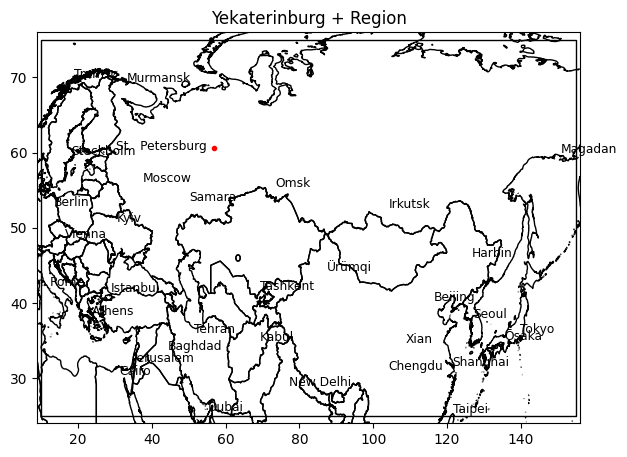

In [4]:
# Plot
fig, ax = plt.subplots(figsize=(7,6))
plt.title("Yekaterinburg + Region")

ax.set_xlim(bounding_box[0] -1, bounding_box[2] + 1)
ax.set_ylim(bounding_box[1] -1, bounding_box[3] + 1)

countries.plot(ax=ax, color="none", edgecolor="black", zorder=10)
map_extent.plot(ax=ax, color='none', edgecolor="black", lw=1, zorder=100)
yekaterinburg.plot(ax=ax, marker=".", color='red', zorder=200)

for i, l in label_points.iterrows():
	plt.text(
        l.geometry.x,
        l.geometry.y,
        f"{l.label_text}",
        fontsize=l.font_size * 4.75,
        horizontalalignment=l.text_align_horizontal,
        verticalalignment="bottom",
		zorder=200
    )